# MNS 5
    Dominik Krzemiński

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import pdb

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [18]:
def euler(f_func, x_0, t_max, dt, **params):
    t = np.arange(0, t_max, dt)
    n = len(t)
    x = np.zeros((n,1))
    x[0] = x_0
    for i in range(1, n):
        x[i] = x[i-1] + f_func(x[i-1], t[i-1], **params)*dt
    return x

def euler_forik(f_func, x_0, timevec, vv, alpha, beta):
    dt = timevec[-1] - timevec[-2]
    n = len(timevec)
    x = np.zeros((n,1))
    x[0] = x_0
    for i in range(1, n):
        x[i] = x[i-1] + f_func(x[i-1], timevec[i-1], alpha=alpha_n, beta=beta_n, v=vv[i-1])*dt
    return x.T

### 1. Potassium channel

In [14]:
def alpha_n(v):
    return (0.01*(v + 55))/(1 - np.exp(-0.1*(v+55)))

def beta_n(v):
    return 0.125*np.exp(-0.0125*(v + 65))

def dndt(n, t, v=0, alpha=alpha_n, beta=beta_n):
    return alpha(v)*(1-n)-beta(v)*n

def ik(v, tv, n0, gk=36e-9, ek=-77):
    nvec = euler_forik(dndt, n0, tv, v, alpha=alpha_n, beta=beta_n)
    return gk*(nvec**4)*(v-ek)

In [31]:
vvec = np.linspace(-150, 150,100)

tau_n = lambda v: (alpha_n(v) + beta_n(v))**-1
n_inf = lambda v: alpha_n(v)*(alpha_n(v) + beta_n(v))**-1

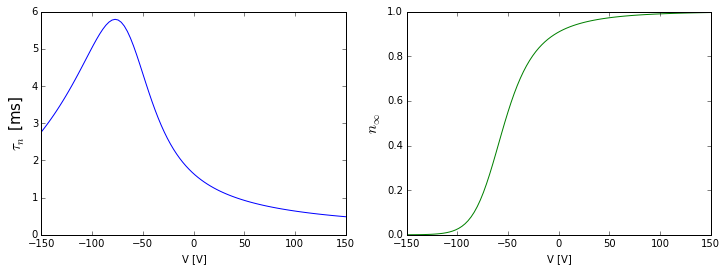

In [35]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(vvec, tau_n(vvec))
plt.xlabel('V [V]')
plt.ylabel(r'$\tau_n$ [ms]', fontsize=15)

plt.subplot(1,2,2)
plt.plot(vvec, n_inf(vvec), 'g')
plt.xlabel('V [V]')
plt.ylabel(r'$n_{\infty}$', fontsize=15)

plt.show()

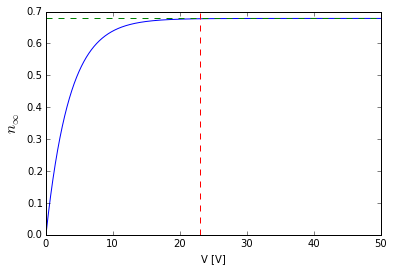

In [7]:
dt = 1./200
t_max = 50
tv = np.arange(0, t_max, dt)
nvec = euler(dndt, 0, t_max, dt, alpha=alpha_n, beta=beta_n, v=-40)
plt.plot(tv, nvec)
plt.xlabel('V [V]')
plt.ylabel(r'$n_{\infty}$', fontsize=15)
plt.axvline(x=23, color='r', linestyle='--')
plt.axhline(y=.68, color='g', linestyle='--')
plt.show()

c)

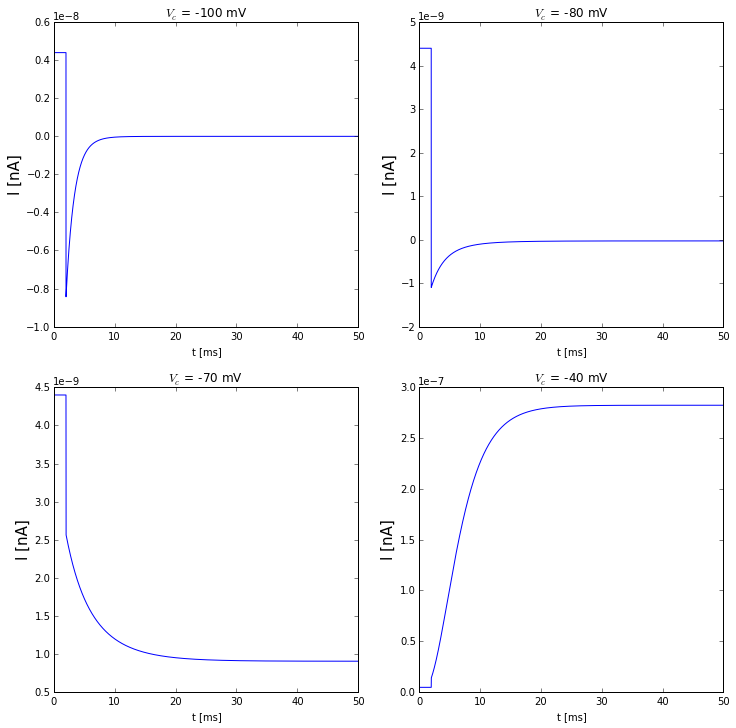

In [29]:
n_0 = 0.3177
v_c = [-100, -80, -70, -40]

plt.figure(figsize=(12,12))
for e, vc in enumerate(v_c):
    vvec = np.piecewise(tv, [tv < 2, tv >= 2], [lambda x: -65, lambda x: vc])
    ikvec = ik(vvec, tv, n_0)
    plt.subplot(2,2,e+1)
    plt.plot(tv, ikvec.T)
    plt.title('$V_c$ = {} mV'.format(vc))
    plt.xlabel('t [ms]')
    plt.ylabel(r'I [nA]', fontsize=15)

plt.show()

### 2. Sodium ion channel

a)

In [37]:
def alpha_m(v):
    return (0.1*(v + 40))/(1 - np.exp(-0.1*(v+40)))

def alpha_h(v):
    return 0.07*np.exp(-0.05*(v+65))

def beta_m(v):
    return 4*np.exp(-0.0556*(v + 65))

def beta_h(v):
    return (1+np.exp(-0.1*(v + 35)))**-1

In [38]:
tau_m = lambda v: (alpha_m(v) + beta_m(v))**-1
m_inf = lambda v: alpha_m(v)*(alpha_m(v) + beta_m(v))**-1

tau_h = lambda v: (alpha_h(v) + beta_h(v))**-1
h_inf = lambda v: alpha_h(v)*(alpha_h(v) + beta_h(v))**-1

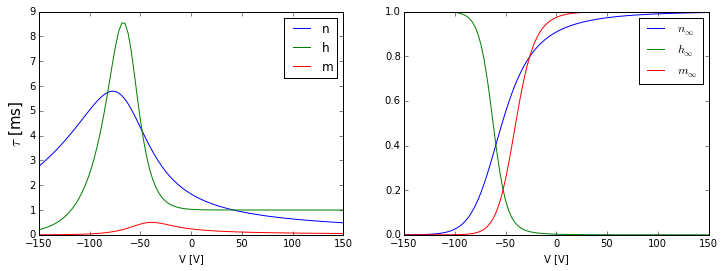

In [43]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(vvec, tau_n(vvec), label=r'n')
plt.plot(vvec, tau_h(vvec), label=r'h')
plt.plot(vvec, tau_m(vvec), label=r'm')
plt.xlabel('V [V]')
plt.ylabel(r'$\tau$ [ms]', fontsize=15)
plt.legend()

plt.subplot(1,2,2)
plt.plot(vvec, n_inf(vvec), label=r'$n_{\infty}$')
plt.plot(vvec, h_inf(vvec), label=r'$h_{\infty}$')
plt.plot(vvec, m_inf(vvec), label=r'$m_{\infty}$')
plt.xlabel('V [V]')
plt.legend()
plt.show()

b)